<a href="https://www.kaggle.com/thirumani/shark-tank-india-analysis?scriptVersionId=88571057" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Shark Tank India (Season 1) Exploratory Data Analysis (EDA)

## Dataset https://www.kaggle.com/thirumani/shark-tank-india

In [1]:
import datetime
print("Notebook was last executed on:", datetime.date.today().strftime("%Y-%b-%d"))

Notebook was last executed on: 2022-Feb-23


### Importing Required Python Libraries

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)

import matplotlib.pyplot as plt
import seaborn as sns
from babel.numbers import format_currency
from wordcloud import WordCloud, STOPWORDS
import geopandas as gpd
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"

import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


### Check and import dataset

In [3]:
! ls -l /kaggle/input/d/thirumani/shark-tank-india/
shark_tank = pd.read_csv('/kaggle/input/d/thirumani/shark-tank-india//Shark Tank India.csv', encoding = "ISO-8859-1")

nRow, nCol = shark_tank.shape
print(f'\nThere are {nRow} rows and {nCol} columns in the dataset')

total 24
-rw-r--r-- 1 nobody nogroup 22801 Feb 23 14:41 'Shark Tank India.csv'

There are 121 rows and 50 columns in the dataset


## Exploratory Data Analysis (EDA)

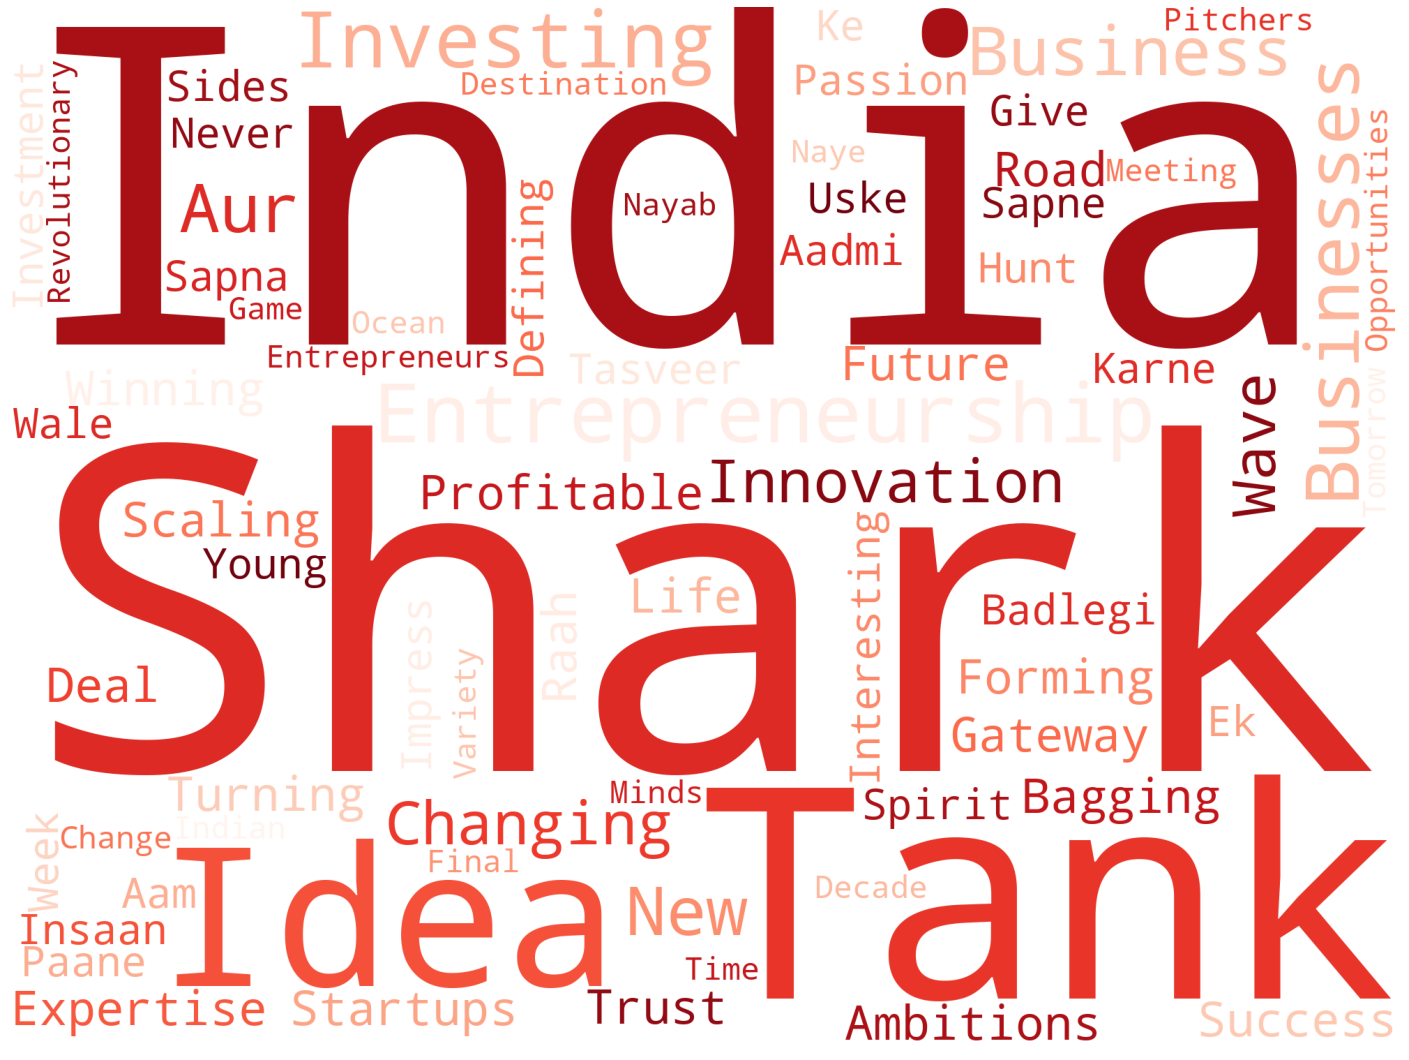

In [4]:
# Word cloud based on episode titles
text = " Shark Tank India ".join(cat for cat in shark_tank['Episode Title'])
stop_words = list(STOPWORDS) + ["Ka", "Ki", "Ko"]
wordcloud = WordCloud(width=2000, height=1500, stopwords=stop_words, background_color='white', colormap='Reds', collocations=False, random_state=2022).generate(text)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [5]:
shark_tank.head(5)

,Season Number,Episode Number,Episode Title,Pitch Number,Startup Name,Industry,Business Description,Company Website,Number of Presenters,Male Presenters,Female Presenters,Couple Presenters,Pitchers Average Age,Started in,Pitchers City,Pitchers State,Yearly Revenue,Monthly Sales,Gross Margin,Original Ask Amount,Original Ask Equity,Valuation Requested,Received Offer,Accepted Offer,Total Deal Amount,Total Deal Equity,Total Deal Debt,Valuation Offered,Ashneer Investment Amount,Ashneer Investment Equity,Ashneer Debt Amount,Namita Investment Amount,Namita Investment Equity,Namita Debt Amount,Anupam Investment Amount,Anupam Investment Equity,Anupam Debt Amount,Vineeta Investment Amount,Vineeta Investment Equity,Vineeta Debt Amount,Aman Investment Amount,Aman Investment Equity,Aman Debt Amount,Peyush Investment Amount,Peyush Investment Equity,Peyush Debt Amount,Ghazal Investment Amount,Ghazal Investment Equity,Ghazal Debt Amount,Number of sharks in deal
0,1,1,Badlegi Business Ki Tasveer,1,BluePine Foods,Food,Frozen Momos,https://bluepinefoods.com/,3,2.0,1.0,0.0,Middle,2016.0,Delhi,Delhi,95.0,800000.0,NaN,50.0,5.0,1000,1,1.0,75.0,16.00,NaN,469.0,25.0,5.33,NaN,0.0,0.0,NaN,0.0,0.0,NaN,25.0,5.33,NaN,25.0,5.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
1,1,1,Badlegi Business Ki Tasveer,2,Booz Scooters,Electrical Vehicles,Renting e-bike for mobility in private spaces,https://www.boozup.net/,1,1.0,NaN,0.0,Young,2017.0,Ahmedabad,Gujarat,4.0,40000.0,NaN,40.0,15.0,267,1,1.0,40.0,50.00,NaN,80.0,20.0,25.00,NaN,0.0,0.0,NaN,0.0,0.0,NaN,20.0,25.00,NaN,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2,1,1,Badlegi Business Ki Tasveer,3,Heart up my Sleeves,Beauty/Fashion,Detachable Sleeves,https://heartupmysleeves.com/,1,NaN,1.0,0.0,Young,2021.0,Delhi,Delhi,NaN,200000.0,NaN,25.0,10.0,250,1,1.0,25.0,30.00,NaN,83.0,0.0,0.00,NaN,0.0,0.0,NaN,12.5,15.0,NaN,12.5,15.00,NaN,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3,1,2,"Insaan, Ideas Aur Sapne",4,Tagz Foods,Food,Healthy Potato Chips Snacks,https://tagzfoods.com/,2,2.0,NaN,0.0,Middle,2019.0,Bangalore,Karnataka,700.0,NaN,48.0,70.0,1.0,7000,1,1.0,70.0,2.75,NaN,2545.0,70.0,2.75,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.00,NaN,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,1,2,"Insaan, Ideas Aur Sapne",5,Head and Heart,Education,Brain Development Course,https://thehnh.in/,4,1.0,3.0,1.0,Middle,2015.0,NaN,Punjab,30.0,NaN,NaN,50.0,5.0,1000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
shark_tank.tail(10).T

,111,112,113,114,115,116,117,118,119,120
Season Number,1,1,1,1,1,1,1,1,1,1
Episode Number,34,34,34,35,35,35,36,36,36,36
Episode Title,Scaling Ambitions,Scaling Ambitions,Scaling Ambitions,The Final Destination,The Final Destination,The Final Destination,Gateway To Shark Tank India,Gateway To Shark Tank India,Gateway To Shark Tank India,Gateway To Shark Tank India
Pitch Number,112,113,114,115,116,117,118,119,120,121
Startup Name,Twee in One,Green Protein,On2Cook,Jain Shikanji,Woloo,Elcare India,SneaKare,French Crown,Store My Goods,Devnagri
Industry,Beauty/Fashion,Food,Food,Food,Technology,Medical,Beauty/Fashion,Beauty/Fashion,Services,Technology
Business Description,Reversible and convertible clothing,Plant-Based Protein,Fastest Cooking Device,Lemonade,Washroom Finder,Carenting for Elders,Shoe Sneaker kits storage crates,Clothes,Storage solutions,Translation of language content
Company Website,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number of Presenters,1,2,1,1,3,3,1,2,3,2
Male Presenters,NaN,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0


In [7]:
shark_tank['Male Presenters'] = shark_tank['Male Presenters'].astype(pd.Int32Dtype())
shark_tank['Female Presenters'] = shark_tank['Female Presenters'].astype(pd.Int32Dtype())
shark_tank['Started in'] = shark_tank['Started in'].astype(pd.Int32Dtype())
shark_tank['Yearly Revenue'] = shark_tank['Yearly Revenue'].astype(pd.Int32Dtype())
shark_tank['Monthly Sales'] = shark_tank['Monthly Sales'].astype(pd.Int32Dtype())
shark_tank['Valuation Offered'] = shark_tank['Valuation Offered'].astype(pd.Int32Dtype())

In [8]:
shark_tank.sample(10)

,Season Number,Episode Number,Episode Title,Pitch Number,Startup Name,Industry,Business Description,Company Website,Number of Presenters,Male Presenters,Female Presenters,Couple Presenters,Pitchers Average Age,Started in,Pitchers City,Pitchers State,Yearly Revenue,Monthly Sales,Gross Margin,Original Ask Amount,Original Ask Equity,Valuation Requested,Received Offer,Accepted Offer,Total Deal Amount,Total Deal Equity,Total Deal Debt,Valuation Offered,Ashneer Investment Amount,Ashneer Investment Equity,Ashneer Debt Amount,Namita Investment Amount,Namita Investment Equity,Namita Debt Amount,Anupam Investment Amount,Anupam Investment Equity,Anupam Debt Amount,Vineeta Investment Amount,Vineeta Investment Equity,Vineeta Debt Amount,Aman Investment Amount,Aman Investment Equity,Aman Debt Amount,Peyush Investment Amount,Peyush Investment Equity,Peyush Debt Amount,Ghazal Investment Amount,Ghazal Investment Equity,Ghazal Debt Amount,Number of sharks in deal
12,1,5,Hunt For Interesting Business,13,Revamp Moto,Electrical Vehicles,E-Bike Mitra bud-e RM,https://www.revampmoto.in/,3,3,<NA>,0.0,Young,<NA>,Nashik,Maharashtra,<NA>,1000,NaN,100.0,1.00,10000,1,1.0,100.0,1.50,NaN,6667,0.0,0.0,NaN,0.0,0.0,NaN,50.0,0.75,NaN,0.0,0.0,NaN,50.0,0.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
54,1,18,Investing In Profitable Businesses,55,India Hemp and Co,Food,Hemp Food Products,NaN,1,<NA>,1,0.0,NaN,<NA>,NaN,NaN,<NA>,200000,NaN,50.0,4.00,1250,1,0.0,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118,1,36,Gateway To Shark Tank India,119,French Crown,Beauty/Fashion,Clothes,NaN,2,2,<NA>,0.0,Middle,2017,Surat,Gujarat,7200,<NA>,70.0,150.0,0.33,45455,1,0.0,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,1,29,Businesses Of Tomorrow,93,PDD Falcon,Manufacturing,Stainless Steel Items,NaN,2,1,1,NaN,NaN,2018,Gandhinagar,Gujarat,272,<NA>,30.0,75.0,3.00,2500,1,0.0,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,1,29,Businesses Of Tomorrow,94,PlayBoxTV,Services,Streaming Platform,NaN,2,2,<NA>,0.0,NaN,<NA>,Mumbai,Maharashtra,1020,<NA>,NaN,100.0,3.50,2857,1,0.0,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,1,9,Defining Innovations,25,Altor,Manufacturing,Smart Helmets,https://www.altorsmarthelmet.com/,4,4,<NA>,0.0,Young,2019,Kolkata,West Bengal,<NA>,<NA>,NaN,50.0,5.00,1000,1,1.0,50.0,7.00,NaN,714,0.0,0.0,NaN,25.0,3.5,NaN,0.0,0.00,NaN,NaN,NaN,NaN,25.0,3.50,NaN,0.0,0.00,NaN,NaN,NaN,NaN,2.0
22,1,8,Shark Ko Impress Karne Wale Ideas,23,Vivalyf Innovations,Medical,Easy Life Prickless Diabetes Testing Machine,https://vivalyf.in/,2,1,1,0.0,Young,<NA>,Hyderabad,Telangana,<NA>,<NA>,NaN,56.0,7.50,747,1,1.0,56.0,33.33,NaN,168,0.0,0.0,NaN,0.0,0.0,NaN,28.0,16.66,NaN,NaN,NaN,NaN,0.0,0.00,NaN,28.0,16.66,NaN,NaN,NaN,NaN,2.0
59,1,19,Forming An Idea And Bagging A Deal,60,Keto India,Food,Customised Keto Diets for various medical issues,NaN,1,1,<NA>,0.0,NaN,<NA>,NaN,NaN,180,<NA>,NaN,150.0,1.25,12000,1,0.0,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,1,6,"New Week, New Ideas",18,Hecoll,Beauty/Fashion,Pollution Resistant Fabric - Healthy Cover For...,https://hecoll.com/,1,<NA>,1,0.0,Middle,2019,Hyderabad,Telangana,107,<NA>,NaN,100.0,1.00,10000,0,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,1,34,Scaling Ambitions,112,Twee in One,Beauty/Fashion,Reversible and convertible clothing,NaN,1,<NA>,1,0.0,NaN,<NA>,NaN,NaN,<NA>,<NA>,NaN,30.0,7.50,400,0,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
shark_tank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 50 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Season Number              121 non-null    int64  
 1   Episode Number             121 non-null    int64  
 2   Episode Title              121 non-null    object 
 3   Pitch Number               121 non-null    int64  
 4   Startup Name               121 non-null    object 
 5   Industry                   121 non-null    object 
 6   Business Description       121 non-null    object 
 7   Company Website            49 non-null     object 
 8   Number of Presenters       121 non-null    int64  
 9   Male Presenters            102 non-null    Int32  
 10  Female Presenters          62 non-null     Int32  
 11  Couple Presenters          102 non-null    float64
 12  Pitchers Average Age       55 non-null     object 
 13  Started in                 65 non-null     Int32  

In [10]:
shark_tank.describe().T.round(2).style.background_gradient(cmap = 'Oranges')

,count,mean,std,min,25%,50%,75%,max
Season Number,121.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Episode Number,121.000000,19.310000,10.380000,1.000000,11.000000,19.000000,28.000000,36.000000
Pitch Number,121.000000,61.000000,35.070000,1.000000,31.000000,61.000000,91.000000,121.000000
Number of Presenters,121.000000,2.070000,0.920000,1.000000,1.000000,2.000000,3.000000,6.000000
Male Presenters,102.000000,1.730000,0.970000,1.000000,1.000000,1.000000,2.000000,6.000000
Female Presenters,62.000000,1.210000,0.480000,1.000000,1.000000,1.000000,1.000000,3.000000
Couple Presenters,102.000000,0.170000,0.370000,0.000000,0.000000,0.000000,0.000000,1.000000
Started in,65.000000,2018.280000,2.610000,2005.000000,2017.000000,2019.000000,2020.000000,2021.000000
Yearly Revenue,49.000000,422.590000,1084.520000,0.000000,60.000000,115.000000,250.000000,7200.000000
Monthly Sales,61.000000,1550052.460000,3258030.400000,0.000000,200000.000000,600000.000000,1600000.000000,20000000.000000


In [11]:
# Unique values in each column
for col in shark_tank.columns:
    print("Number of unique values in", col, "-", shark_tank[col].nunique())

Number of unique values in Season Number - 1
Number of unique values in Episode Number - 36
Number of unique values in Episode Title - 36
Number of unique values in Pitch Number - 121
Number of unique values in Startup Name - 121
Number of unique values in Industry - 11
Number of unique values in Business Description - 121
Number of unique values in Company Website - 49
Number of unique values in Number of Presenters - 5
Number of unique values in Male Presenters - 5
Number of unique values in Female Presenters - 3
Number of unique values in Couple Presenters - 2
Number of unique values in Pitchers Average Age - 3
Number of unique values in Started in - 10
Number of unique values in Pitchers City - 35
Number of unique values in Pitchers State - 20
Number of unique values in Yearly Revenue - 38
Number of unique values in Monthly Sales - 39
Number of unique values in Gross Margin - 22
Number of unique values in Original Ask Amount - 24
Number of unique values in Original Ask Equity - 19


## Season one of SHARK TANK INDIA was broadcasted in SonyLiv OTT
### In 36 episodes, there were _(real)_ 121 pitches

In [12]:
# Data set information
print(shark_tank['Season Number'].max(), "season \n")
print(shark_tank['Episode Number'].max(), "episodes \n")
print(shark_tank['Pitch Number'].max(), "startup companies came for pitching \n")

1 season 

36 episodes 

121 startup companies came for pitching 



In [13]:
# Types of industries, came for investments
print(shark_tank['Industry'].value_counts())

tmp = shark_tank['Industry'].value_counts().sort_values(ascending=True)
fig = px.bar(tmp, x="Industry", title="Shark Tank India", template='simple_white', text=tmp)
fig.show()

Food                   37
Beauty/Fashion         22
Manufacturing          17
Technology             11
Education               8
Services                7
Medical                 7
Electrical Vehicles     4
Animal/Pets             3
Hardware                3
Sports                  2
Name: Industry, dtype: int64


In [14]:
# Gender wise
print("Total pitchers -", int(shark_tank['Number of Presenters'].sum()), "\n")

print("Total male pitchers -", int(shark_tank['Male Presenters'].sum()), "\n")

print("Total female pitchers -", int(shark_tank['Female Presenters'].sum()), "\n")

print("Male entrepreneurs percentage - ", round(shark_tank['Male Presenters'].sum()/shark_tank['Number of Presenters'].sum()*100, 0), "%\n", sep='')
print("Female entrepreneurs percentage - ", round(shark_tank['Female Presenters'].sum()/shark_tank['Number of Presenters'].sum()*100, 0), "%\n", sep='')
print("Couple entrepreneurs percentage - ", round(shark_tank.loc[shark_tank['Couple Presenters']==1]['Couple Presenters'].sum()/shark_tank['Number of Presenters'].sum()*100, 0), "% (data incomplete)\n", sep='')

Total pitchers - 251 

Total male pitchers - 176 

Total female pitchers - 75 

Male entrepreneurs percentage - 70.0%

Female entrepreneurs percentage - 30.0%

Couple entrepreneurs percentage - 7.0% (data incomplete)



### 73% companies received offers and 27% startups could not convince Sharks to invest

1    88
0    33
Name: Received Offer, dtype: int64 

1    73%
0    27%
Name: Received Offer, dtype: object


<AxesSubplot:xlabel='Received Offer', ylabel='count'>

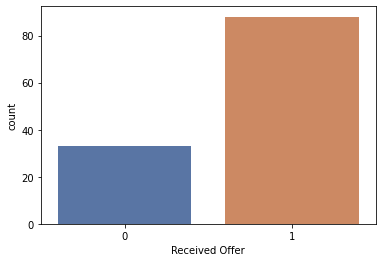

In [15]:
# Offers received
print(shark_tank['Received Offer'].value_counts(), "\n")
print(round(shark_tank['Received Offer'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%'))
sns.countplot(x='Received Offer', data=shark_tank, palette='deep')

# 88 companies received investments and 33 startups could not get offers

### 76% companies accepted offers and 24% startups didn't accept Sharks offer

1.0    67
0.0    21
Name: Accepted Offer, dtype: int64 

1.0    76%
0.0    24%
Name: Accepted Offer, dtype: object


<AxesSubplot:xlabel='Accepted Offer', ylabel='count'>

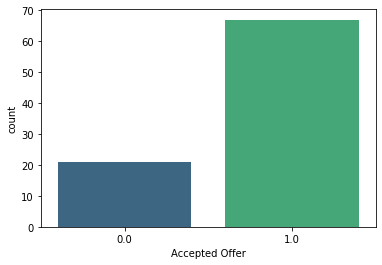

In [16]:
# Offers accepted
print(shark_tank['Accepted Offer'].value_counts(), "\n")
print(round(shark_tank['Accepted Offer'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%'))
sns.countplot(x='Accepted Offer', data=shark_tank, palette="viridis")

# 67 companies accepted investments they got and 21 startup companies did not accept offer

In [17]:
# Offers rejected by pitchers/startup companies
shark_tank.loc[shark_tank['Accepted Offer']==0, ["Startup Name","Original Ask Amount","Original Ask Equity"]]

,Startup Name,Original Ask Amount,Original Ask Equity
6,qZense Labs,100.0,0.25
19,Torch-it,75.0,1.00
20,La Kheer Deli,50.0,7.50
26,Kabira Handmad,100.0,5.00
40,Morriko Pure Foods,100.0,3.00
54,India Hemp and Co,50.0,4.00
59,Keto India,150.0,1.25
69,Moonshine,80.0,0.50
70,Falhari,50.0,2.00
72,Urban Monkey,100.0,1.00


In [18]:
# Sum of investment amount asked by all startup companies, in Shark Tank, in India
print(format_currency(shark_tank['Original Ask Amount'].sum()/100, 'INR', locale='en_IN').replace(".00", ""), "crores")

₹378.23 crores


In [19]:
# Sum of amount invested by all sharks, in Shark Tank India
print(format_currency(shark_tank['Total Deal Amount'].sum()/100, 'INR', locale='en_IN').replace(".00", ""), "crores")

₹39.03 crores


In [20]:
# Sum of loan/debt amount given by all sharks, in India Shark Tank
print(format_currency(shark_tank['Total Deal Debt'].sum()/100, 'INR', locale='en_IN').replace(".00", ""), "crores")

₹3.51 crores


In [21]:
# Top 14 investments, as per total investment/deal amount
print(shark_tank.groupby('Startup Name')['Total Deal Amount'].max().nlargest(14))

tmpdf = shark_tank.sort_values('Total Deal Amount', ascending=False)[0:14]
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Amount', color="Startup Name", title="Highest Investment as per deal amount (in lakhs)", text=tmpdf['Total Deal Amount'].map(int).map(str) + " lakhs")
fig.show()

Startup Name
Aas Vidyalaya          150.0
Annie                  105.0
Get-A-Whey             100.0
Hammer Lifestyle       100.0
Humpy A2               100.0
IN A CAN               100.0
Insurance Samadhan     100.0
Proxgy                 100.0
Raising Superstars     100.0
Revamp Moto            100.0
Skippi Ice Pops        100.0
Sunfox Technologies    100.0
The Renal Project      100.0
The Yarn Bazaar        100.0
Name: Total Deal Amount, dtype: float64


In [22]:
# Top 10 investments, as per total equity/shares percentage
print(shark_tank.groupby('Startup Name')['Total Deal Equity'].max().nlargest(10))

tmpdf = shark_tank.sort_values('Total Deal Equity', ascending=False)[0:10]
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Equity', color="Startup Name", title="Highest Investment as per Equity percentage", text=tmpdf['Total Deal Equity'].map(int).map(str) + "%")
fig.show()

Startup Name
Sid07 Designs          75.00
Booz Scooters          50.00
Isak Fragrances        50.00
Hammer Lifestyle       40.00
KG Agrotech            40.00
The Sass Bar           35.00
Vivalyf Innovations    33.33
Gold Safe Solutions    30.00
Heart up my Sleeves    30.00
Jain Shikanji          30.00
Name: Total Deal Equity, dtype: float64


In [23]:
# Top 5 investments, as per total debt/loan amount
print(shark_tank.groupby('Startup Name')['Total Deal Debt'].max().nlargest(5))

tmpdf = shark_tank.sort_values('Total Deal Debt', ascending=False)[0:5]
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Debt', color="Startup Name", title="Highest Investment as per Debt amount (in lakhs)", text=tmpdf['Total Deal Debt'].map(int).map(str) + " lakhs")
fig.show()

Startup Name
Otua              99.0
Namhya Foods      50.0
Store My Goods    50.0
Bamboo India      30.0
NOCD              30.0
Name: Total Deal Debt, dtype: float64


## Which shark invested most ?

In [24]:
# Maximum Investment - as per Investment Amount
print("Aman invested -", max(shark_tank['Ashneer Investment Amount'].sum()/100, shark_tank['Namita Investment Amount'].sum()/100, shark_tank['Anupam Investment Amount'].sum()/100, shark_tank['Vineeta Investment Amount'].sum()/100,
    shark_tank['Aman Investment Amount'].sum()/100, shark_tank['Peyush Investment Amount'].sum()/100, shark_tank['Ghazal Investment Amount'].sum()/100), "crores")

Aman invested - 8.94490016 crores


In [25]:
# Minimum Investment - as per Investment Amount
print("Ghazal invested -", min(shark_tank['Ashneer Investment Amount'].sum()/100, shark_tank['Namita Investment Amount'].sum()/100, shark_tank['Anupam Investment Amount'].sum()/100, shark_tank['Vineeta Investment Amount'].sum()/100,
    shark_tank['Aman Investment Amount'].sum()/100, shark_tank['Peyush Investment Amount'].sum()/100, shark_tank['Ghazal Investment Amount'].sum()/100), "crores")

Ghazal invested - 1.299902525 crores


In [26]:
# Maximum Equity - who received maximum shares
print("Peyush got equity of -", max(shark_tank['Ashneer Investment Equity'].sum(), shark_tank['Namita Investment Equity'].sum(), shark_tank['Anupam Investment Equity'].sum(), shark_tank['Vineeta Investment Equity'].sum(),
    shark_tank['Aman Investment Equity'].sum(), shark_tank['Peyush Investment Equity'].sum(), shark_tank['Ghazal Investment Equity'].sum()), "% in different companies")

Peyush got equity of - 317.84000000000003 % in different companies


In [27]:
# Minimum Equity - who received least amount of shares
print("Ghazal got equity of -", min(shark_tank['Ashneer Investment Equity'].sum(), shark_tank['Namita Investment Equity'].sum(), shark_tank['Anupam Investment Equity'].sum(), shark_tank['Vineeta Investment Equity'].sum(),
    shark_tank['Aman Investment Equity'].sum(), shark_tank['Peyush Investment Equity'].sum(), shark_tank['Ghazal Investment Equity'].sum()), "% in different companies")

Ghazal got equity of - 46.7 % in different companies


In [28]:
# Maximum Investment - as per Debt/loaned Amount
print("Ashneer gave loan of -", max(shark_tank['Ashneer Debt Amount'].sum()/100, shark_tank['Namita Debt Amount'].sum()/100, shark_tank['Anupam Debt Amount'].sum()/100, shark_tank['Vineeta Debt Amount'].sum()/100,
    shark_tank['Aman Debt Amount'].sum()/100, shark_tank['Peyush Debt Amount'].sum()/100, shark_tank['Ghazal Debt Amount'].sum()/100), "crores")

Ashneer gave loan of - 1.17 crores


In [29]:
# Minimum Investment - as per Debt/loaned Amount - Ghazal has not given any loan
print("Ghazal gave loan of -", min(shark_tank['Ashneer Debt Amount'].sum()/100, shark_tank['Namita Debt Amount'].sum()/100, shark_tank['Anupam Debt Amount'].sum()/100, shark_tank['Vineeta Debt Amount'].sum()/100,
    shark_tank['Aman Debt Amount'].sum()/100, shark_tank['Peyush Debt Amount'].sum()/100, shark_tank['Ghazal Debt Amount'].sum()/100), "crores")

Ghazal gave loan of - 0.0 crores


## my BIGG BOSS Dataset https://www.kaggle.com/thirumani/bigg-boss-india-hindi-telugu-tamil-kannada

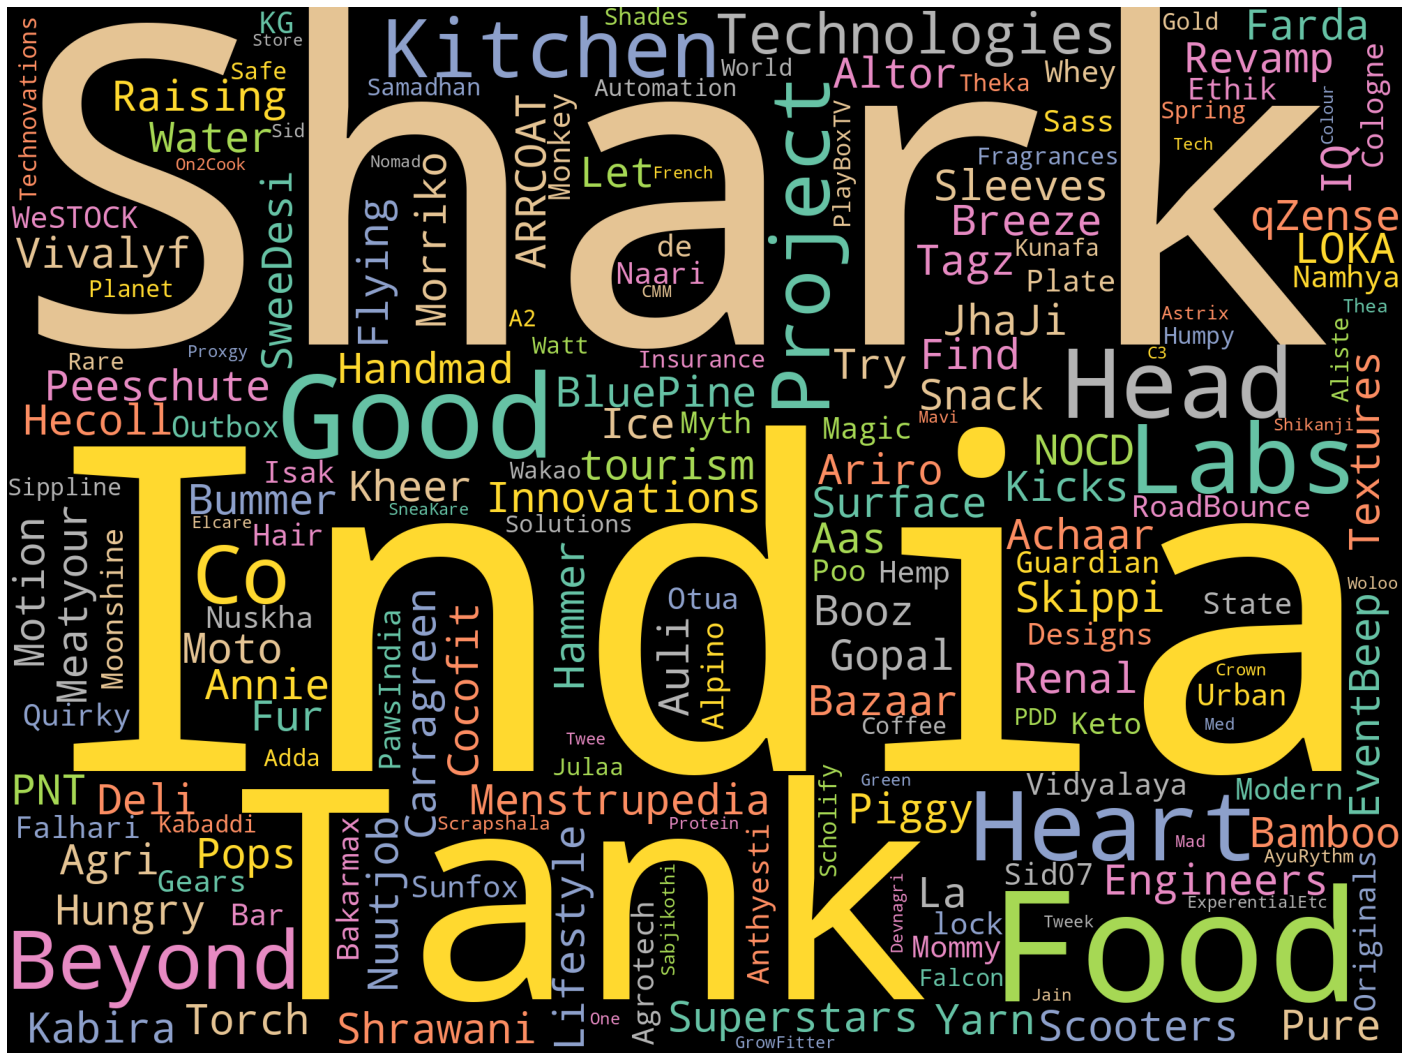

In [30]:
# Word cloud based on Startup Name
text = " Shark Tank India ".join(cat for cat in shark_tank['Startup Name'])
stop_words = list(STOPWORDS)
wordcloud = WordCloud(width=2000, height=1500, stopwords=stop_words, background_color='black', colormap='Set2', collocations=False, random_state=2022).generate(text)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Ashneer Grover's Investments

Total investments by Ashneer 21
Investment amount by Ashneer 5.39 crores
Equity received by Ashneer 93.24 % in different companies
Debt/loan amount by Ashneer 1.14 crores

---------------------------------------------------------------------------
         Startup Name            Industry  Ashneer Investment Amount
       BluePine Foods                Food                      25.00
        Booz Scooters Electrical Vehicles                      20.00
           Tagz Foods                Food                      70.00
      Skippi Ice Pops                Food                      20.00
   Raising Superstars           Education                      50.00
         Beyond Snack                Food                      25.00
        Motion Breeze Electrical Vehicles                      30.00
            EventBeep           Education                      10.00
      The Yarn Bazaar       Manufacturing                      25.00
         Bamboo India       Manufacturing                     

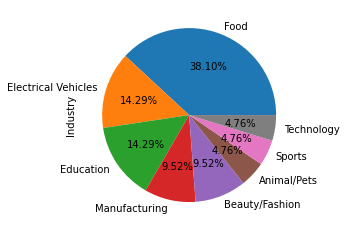

In [31]:
print("Total investments by Ashneer", shark_tank[shark_tank['Ashneer Investment Amount']>0][['Ashneer Investment Amount']].count().to_string()[-2:])
print("Investment amount by Ashneer", round(shark_tank['Ashneer Investment Amount'].sum()/100, 2), "crores")
print("Equity received by Ashneer", round(shark_tank['Ashneer Investment Equity'].sum(), 2), "% in different companies")
print("Debt/loan amount by Ashneer", round(shark_tank['Ashneer Debt Amount'].sum()/100, 2), "crores\n")

print('-'*75)
print(shark_tank.loc[shark_tank['Ashneer Investment Amount']>0][["Startup Name","Industry","Ashneer Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nAshneer industry wise investments\n")
print(shark_tank[shark_tank['Ashneer Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
shark_tank[shark_tank['Ashneer Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Ashneer Investment Amount']>0] [["Startup Name","Ashneer Investment Amount","Ashneer Investment Equity"]].sort_values(by="Ashneer Investment Equity")
fig = px.bar(tmpdf, x="Ashneer Investment Equity", y='Ashneer Investment Amount', color="Startup Name", title="<b>Total equity received by Ashneer (in %) for investment (in lakhs)</b>", text=tmpdf['Ashneer Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

## Namita Thapar's Investments

Total investments by Namita 24
Investment amount by Namita 6.8 crores
Equity received by Namita 140.78 % in different companies
Debt/loan amount by Namita 0.25 crores

---------------------------------------------------------------------------
         Startup Name       Industry  Namita Investment Amount
               Bummer Beauty/Fashion                 37.500000
      Skippi Ice Pops           Food                 20.000000
         Menstrupedia      Education                 50.000000
                Altor  Manufacturing                 25.000000
              Nuutjob Beauty/Fashion                  8.330000
                Farda Beauty/Fashion                 15.000000
                 Auli Beauty/Fashion                 75.000000
                Annie      Education                 35.000000
    The Renal Project        Medical                 50.000000
              Cocofit           Food                  0.000016
         Beyond Water           Food                 37.500000


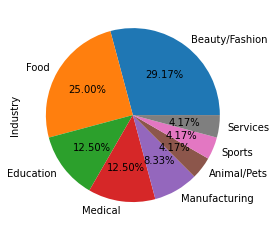

In [32]:
print("Total investments by Namita", shark_tank[shark_tank['Namita Investment Amount']>0][['Namita Investment Amount']].count().to_string()[-2:])
print("Investment amount by Namita", round(shark_tank['Namita Investment Amount'].sum()/100, 2), "crores")
print("Equity received by Namita", round(shark_tank['Namita Investment Equity'].sum(), 2), "% in different companies")
print("Debt/loan amount by Namita", round(shark_tank['Namita Debt Amount'].sum()/100, 2), "crores\n")

print('-'*75)
print(shark_tank.loc[shark_tank['Namita Investment Amount']>0][["Startup Name","Industry","Namita Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nNamita industry wise investments\n")
print(shark_tank[shark_tank['Namita Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
shark_tank[shark_tank['Namita Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Namita Investment Amount']>0] [["Startup Name","Namita Investment Amount","Namita Investment Equity"]].sort_values(by="Namita Investment Equity")
fig = px.bar(tmpdf, x="Namita Investment Equity", y='Namita Investment Amount', color="Startup Name", title="<b>Total equity received by Namita (in %) for investment (in lakhs)</b>", text=tmpdf['Namita Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

## Anupam Mittal's Investments

Total investments by Anupam 24
Investment amount by Anupam 5.34 crores
Equity received by Anupam 166.35 % in different companies
Debt/loan amount by Anupam 0.15 crores

---------------------------------------------------------------------------
            Startup Name            Industry  Anupam Investment Amount
     Heart up my Sleeves      Beauty/Fashion                 12.500000
                  Cos IQ      Beauty/Fashion                 25.000000
             Revamp Moto Electrical Vehicles                 50.000000
         Skippi Ice Pops                Food                 20.000000
     Vivalyf Innovations             Medical                 28.000000
                Meatyour                Food                 10.000000
ARRCOAT Surface Textures       Manufacturing                 50.000000
                    LOKA          Technology                 13.330000
                   Annie           Education                 35.000000
              Carragreen       Manufacturing 

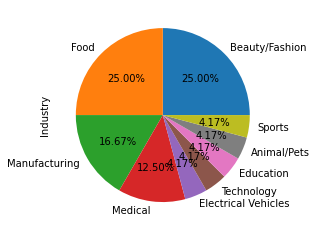

In [33]:
print("Total investments by Anupam", shark_tank[shark_tank['Anupam Investment Amount']>0][['Anupam Investment Amount']].count().to_string()[-2:])
print("Investment amount by Anupam", round(shark_tank['Anupam Investment Amount'].sum()/100, 2), "crores")
print("Equity received by Anupam", round(shark_tank['Anupam Investment Equity'].sum(), 2), "% in different companies")
print("Debt/loan amount by Anupam", round(shark_tank['Anupam Debt Amount'].sum()/100, 2), "crores\n")

print('-'*75)
print(shark_tank.loc[shark_tank['Anupam Investment Amount']>0][["Startup Name","Industry","Anupam Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nAnupam industry wise investments\n")
print(shark_tank[shark_tank['Anupam Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
shark_tank[shark_tank['Anupam Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Anupam Investment Amount']>0] [["Startup Name","Anupam Investment Amount","Anupam Investment Equity"]].sort_values(by="Anupam Investment Equity")
fig = px.bar(tmpdf, x="Anupam Investment Equity", y='Anupam Investment Amount', color="Startup Name", title="<b>Total equity received by Anupam (in %) for investment (in lakhs)</b>", text=tmpdf['Anupam Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

## Vineeta Singh's Investments

Total investments by Vineeta 16
Investment amount by Vineeta 3.35 crores
Equity received by Vineeta 135.53 % in different companies
Debt/loan amount by Vineeta 0.3 crores

---------------------------------------------------------------------------
       Startup Name            Industry  Vineeta Investment Amount
     BluePine Foods                Food                      25.00
      Booz Scooters Electrical Vehicles                      20.00
Heart up my Sleeves      Beauty/Fashion                      12.50
               NOCD                Food                      20.00
             Cos IQ      Beauty/Fashion                      25.00
    Skippi Ice Pops                Food                      20.00
         Get-A-Whey                Food                      33.33
   The Quirky Naari      Beauty/Fashion                      17.50
Sunfox Technologies             Medical                      20.00
           Humpy A2                Food                      33.33
Gold Safe Solut

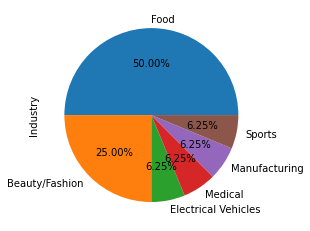

In [34]:
print("Total investments by Vineeta", shark_tank[shark_tank['Vineeta Investment Amount']>0][['Vineeta Investment Amount']].count().to_string()[-2:])
print("Investment amount by Vineeta", round(shark_tank['Vineeta Investment Amount'].sum()/100, 2), "crores")
print("Equity received by Vineeta", round(shark_tank['Vineeta Investment Equity'].sum(), 2), "% in different companies")
print("Debt/loan amount by Vineeta", round(shark_tank['Vineeta Debt Amount'].sum()/100, 2), "crores\n")

print('-'*75)
print(shark_tank.loc[shark_tank['Vineeta Investment Amount']>0][["Startup Name","Industry","Vineeta Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nVineeta industry wise investments\n")
print(shark_tank[shark_tank['Vineeta Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
shark_tank[shark_tank['Vineeta Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Vineeta Investment Amount']>0] [["Startup Name","Vineeta Investment Amount","Vineeta Investment Equity"]].sort_values(by="Vineeta Investment Equity")
fig = px.bar(tmpdf, x="Vineeta Investment Equity", y='Vineeta Investment Amount', color="Startup Name", title="<b>Total equity received by Vineeta (in %) for investment (in lakhs)</b>", text=tmpdf['Vineeta Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

## Aman Gupta's Investments

Total investments by Aman 29
Investment amount by Aman 8.94 crores
Equity received by Aman 164.25 % in different companies
Debt/loan amount by Aman 0.5 crores

---------------------------------------------------------------------------
         Startup Name            Industry  Aman Investment Amount
       BluePine Foods                Food               25.000000
            Peeschute      Beauty/Fashion               75.000000
               Bummer      Beauty/Fashion               37.500000
          Revamp Moto Electrical Vehicles               50.000000
      Skippi Ice Pops                Food               20.000000
   Raising Superstars           Education               50.000000
         Beyond Snack                Food               25.000000
                Altor       Manufacturing               25.000000
                Ariro       Manufacturing               25.000000
              Nuutjob      Beauty/Fashion                8.330000
             Meatyour                F

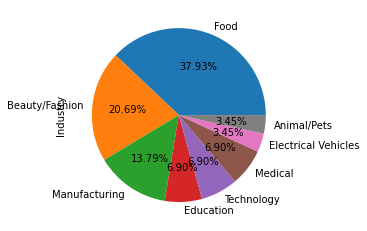

In [35]:
print("Total investments by Aman", shark_tank[shark_tank['Aman Investment Amount']>0][['Aman Investment Amount']].count().to_string()[-2:])
print("Investment amount by Aman", round(shark_tank['Aman Investment Amount'].sum()/100, 2), "crores")
print("Equity received by Aman", round(shark_tank['Aman Investment Equity'].sum(), 2), "% in different companies")
print("Debt/loan amount by Aman", round(shark_tank['Aman Debt Amount'].sum()/100, 2), "crores\n")

print('-'*75)
print(shark_tank.loc[shark_tank['Aman Investment Amount']>0][["Startup Name","Industry","Aman Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nAman industry wise investments\n")
print(shark_tank[shark_tank['Aman Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
shark_tank[shark_tank['Aman Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Aman Investment Amount']>0] [["Startup Name","Aman Investment Amount","Aman Investment Equity"]].sort_values(by="Aman Investment Equity")
fig = px.bar(tmpdf, x="Aman Investment Equity", y='Aman Investment Amount', color="Startup Name", title="<b>Total equity received by Aman (in %) for investment (in lakhs)</b>", text=tmpdf['Aman Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

## Peyush Bansal's Investments

Total investments by Peyush 28
Investment amount by Peyush 7.9 crores
Equity received by Peyush 317.84 % in different companies
Debt/loan amount by Peyush 1.17 crores

---------------------------------------------------------------------------
         Startup Name       Industry  Peyush Investment Amount
  Vivalyf Innovations        Medical                 28.000000
                Ariro  Manufacturing                 25.000000
              Nuutjob Beauty/Fashion                  8.330000
             Meatyour           Food                 10.000000
            EventBeep      Education                 10.000000
                 LOKA     Technology                 13.330000
                Annie      Education                 35.000000
           Carragreen  Manufacturing                 25.000000
      The Yarn Bazaar  Manufacturing                 25.000000
                  PNT     Technology                 25.000000
Find Your Kicks India Beauty/Fashion                 10.000000


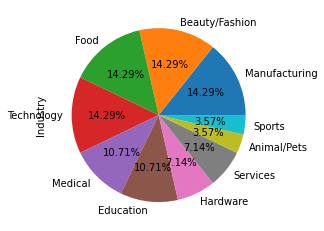

In [36]:
print("Total investments by Peyush", shark_tank[shark_tank['Peyush Investment Amount']>0][['Peyush Investment Amount']].count().to_string()[-2:])
print("Investment amount by Peyush", round(shark_tank['Peyush Investment Amount'].sum()/100, 2), "crores")
print("Equity received by Peyush", round(shark_tank['Peyush Investment Equity'].sum(), 2), "% in different companies")
print("Debt/loan amount by Peyush", round(shark_tank['Peyush Debt Amount'].sum()/100, 2), "crores\n")

print('-'*75)
print(shark_tank.loc[shark_tank['Peyush Investment Amount']>0][["Startup Name","Industry","Peyush Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nPeyush industry wise investments\n")
print(shark_tank[shark_tank['Peyush Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
shark_tank[shark_tank['Peyush Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Peyush Investment Amount']>0] [["Startup Name","Peyush Investment Amount","Peyush Investment Equity"]].sort_values(by="Peyush Investment Equity")
fig = px.bar(tmpdf, x="Peyush Investment Equity", y='Peyush Investment Amount', color="Startup Name", title="<b>Total equity received by Peyush (in %) for investment (in lakhs)</b>", text=tmpdf['Peyush Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

## Ghazal Alagh's Investments

Total investments by Ghazal  7
Investment amount by Ghazal 1.3 crores
Equity received by Ghazal 46.7 % in different companies
Debt/loan amount by Ghazal 0.0 crores

---------------------------------------------------------------------------
       Startup Name       Industry  Ghazal Investment Amount
       The Sass Bar Beauty/Fashion                 25.000000
Sunfox Technologies        Medical                 20.000000
 Watt Technovations        Medical                  0.000253
           Humpy A2           Food                 33.330000
Gold Safe Solutions  Manufacturing                 16.660000
        Wakao Foods           Food                 25.000000
 Nomad Food Project           Food                 10.000000
---------------------------------------------------------------------------

Ghazal industry wise investments

Food              3
Medical           2
Beauty/Fashion    1
Manufacturing     1
Name: Industry, dtype: int64


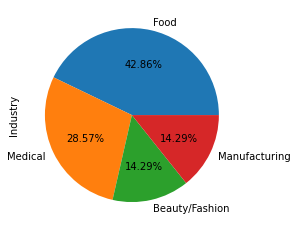

In [37]:
print("Total investments by Ghazal", shark_tank[shark_tank['Ghazal Investment Amount']>0][['Ghazal Investment Amount']].count().to_string()[-2:])
print("Investment amount by Ghazal", round(shark_tank['Ghazal Investment Amount'].sum()/100, 2), "crores")
print("Equity received by Ghazal", round(shark_tank['Ghazal Investment Equity'].sum(), 2), "% in different companies")
print("Debt/loan amount by Ghazal", round(shark_tank['Ghazal Debt Amount'].sum()/100, 2), "crores\n")

print('-'*75)
print(shark_tank.loc[shark_tank['Ghazal Investment Amount']>0][["Startup Name","Industry","Ghazal Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nGhazal industry wise investments\n")
print(shark_tank[shark_tank['Ghazal Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
shark_tank[shark_tank['Ghazal Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Ghazal Investment Amount']>0] [["Startup Name","Ghazal Investment Amount","Ghazal Investment Equity"]].sort_values(by="Ghazal Investment Equity")
fig = px.bar(tmpdf, x="Ghazal Investment Equity", y='Ghazal Investment Amount', color="Startup Name", title="<b>Total equity received by Ghazal (in %) for investment (in lakhs)</b>", text=tmpdf['Ghazal Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

1.0    22
2.0    21
3.0    15
4.0     5
5.0     4
Name: Number of sharks in deal, dtype: int64 

1.0    33%
2.0    31%
3.0    22%
4.0     7%
5.0     6%
Name: Number of sharks in deal, dtype: object


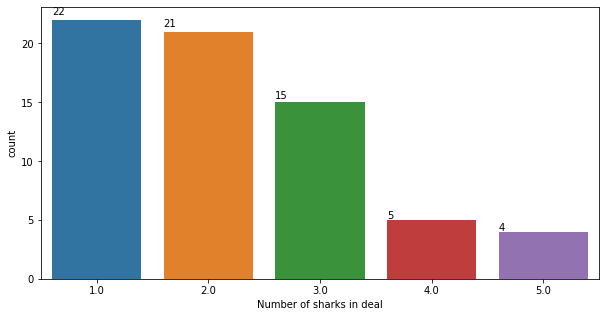

In [38]:
# Number of sharks in a deal
print(shark_tank['Number of sharks in deal'].value_counts(), "\n")

# In percentage
print(round(shark_tank['Number of sharks in deal'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%'))

fig = plt.figure(figsize=(10, 5))
ax = sns.countplot(data = shark_tank, x = 'Number of sharks in deal')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.02))

In [39]:
# All sharks deals
print(shark_tank.loc[shark_tank['Number of sharks in deal'] >= 5][["Startup Name","Total Deal Amount","Total Deal Equity"]])

             Startup Name  Total Deal Amount  Total Deal Equity
15        Skippi Ice Pops              100.0               15.0
49  Find Your Kicks India               50.0               25.0
63               IN A CAN              100.0               10.0
79    Sunfox Technologies              100.0                6.0


In [40]:
print(shark_tank['Pitchers City'].value_counts(), "\n")

Mumbai                14
Delhi                 13
Pune                   6
Ahmedabad              5
Hyderabad              5
Bangalore              5
Kolkata                4
Nagpur                 2
Jammu                  2
Thiruvananthapuram     2
Gandhinagar            2
Surat                  2
Banaras                1
Goa                    1
Mangalore              1
Coimbatore             1
Pune, Delhi            1
Lucknow                1
Dehradun               1
Malegaon               1
Mathura                1
Indore                 1
Bangalore, Kolkata     1
Ludhiana               1
Panipat                1
Valsad                 1
Jaipur                 1
Chennai                1
Vadodara               1
Nashik                 1
Darbhanga              1
Jalna                  1
Mohali,Delhi           1
Baramati               1
Modinagar              1
Name: Pitchers City, dtype: int64 



In [41]:
print(shark_tank['Pitchers State'].value_counts(), "\n")

Maharashtra               26
Delhi                     13
Gujarat                   11
Karnataka                  6
Telangana                  5
West Bengal                4
Uttar Pradesh              4
Jammu & Kashmir            2
Tamil Nadu                 2
Kerala                     2
Punjab                     2
Bihar                      1
Rajasthan                  1
Madhya Pradesh             1
Haryana                    1
Karnataka, West Bengal     1
Punjab, Delhi              1
Uttarakhand                1
Goa                        1
Maharashtra, Delhi         1
Name: Pitchers State, dtype: int64 



In [42]:
shp_gdf = gpd.read_file('../input/india-gis-data/India States/Indian_states.shp')
merged = shp_gdf.set_index('st_nm').join(shark_tank.set_index('Pitchers State'))
merged['Total Deal Amount'] = merged['Total Deal Amount'].fillna(0)

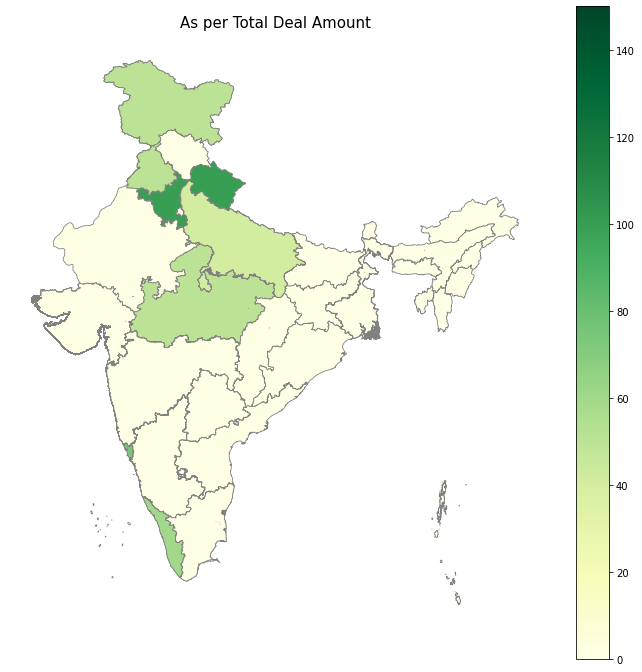

In [43]:
fig, ax = plt.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title('As per Total Deal Amount', fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='Total Deal Amount', cmap='YlGn', linewidth=0.8, ax=ax, edgecolor='0.5', legend=True)

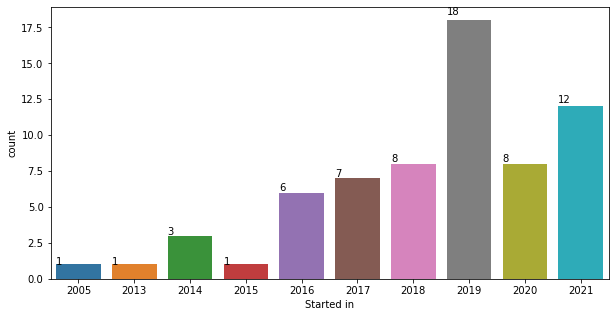

In [44]:
# Startup companies started in year
fig = plt.figure(figsize=(10, 5))
tmp = shark_tank.loc[shark_tank['Started in'].notnull()]
ax = sns.countplot(data = tmp, x = 'Started in')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.02))

In [45]:
# Few companies got more than they asked/expected
shark_tank.loc[shark_tank['Original Ask Amount'] < shark_tank["Total Deal Amount"]][["Startup Name","Original Ask Amount","Total Deal Amount"]]

,Startup Name,Original Ask Amount,Total Deal Amount
0,BluePine Foods,50.0,75.0
15,Skippi Ice Pops,45.0,100.0
36,Annie,30.0,105.0
38,The Yarn Bazaar,50.0,100.0
42,Hammer Lifestyle,30.0,100.0
58,WeSTOCK,50.0,60.0
63,IN A CAN,50.0,100.0
75,The Sass Bar,40.0,50.0
88,Humpy A2,75.0,100.0
108,Tweek Labs,40.0,60.0


In [46]:
# There is NO company which got more valuation than they pitched
shark_tank.loc[shark_tank['Valuation Requested'] < shark_tank["Valuation Offered"]][["Startup Name","Valuation Requested","Valuation Offered"]]

,Startup Name,Valuation Requested,Valuation Offered


In [47]:
# Some companies were on pre-revenue or didn't had any revenue (as of pitching day)
shark_tank.loc[shark_tank['Yearly Revenue'] == 0]

,Season Number,Episode Number,Episode Title,Pitch Number,Startup Name,Industry,Business Description,Company Website,Number of Presenters,Male Presenters,Female Presenters,Couple Presenters,Pitchers Average Age,Started in,Pitchers City,Pitchers State,Yearly Revenue,Monthly Sales,Gross Margin,Original Ask Amount,Original Ask Equity,Valuation Requested,Received Offer,Accepted Offer,Total Deal Amount,Total Deal Equity,Total Deal Debt,Valuation Offered,Ashneer Investment Amount,Ashneer Investment Equity,Ashneer Debt Amount,Namita Investment Amount,Namita Investment Equity,Namita Debt Amount,Anupam Investment Amount,Anupam Investment Equity,Anupam Debt Amount,Vineeta Investment Amount,Vineeta Investment Equity,Vineeta Debt Amount,Aman Investment Amount,Aman Investment Equity,Aman Debt Amount,Peyush Investment Amount,Peyush Investment Equity,Peyush Debt Amount,Ghazal Investment Amount,Ghazal Investment Equity,Ghazal Debt Amount,Number of sharks in deal
23,1,8,Shark Ko Impress Karne Wale Ideas,24,Motion Breeze,Electrical Vehicles,Smart Electric Motorcycle,NaN,4,4,<NA>,0.0,Middle,<NA>,Vadodara,Gujarat,0,<NA>,NaN,30.0,3.0,1000,1,1.0,30.0,6.0,NaN,500,30.0,6.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,1.0
41,1,14,Naye Aur Nayab Pitchers,42,Good Good Piggy,Technology,Digital Piggy Bank,https://goodgoodpiggy.com/,2,<NA>,2,0.0,Young,<NA>,Delhi,Delhi,0,<NA>,NaN,45.0,5.0,900,0,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,1,31,Entrepreneurship Ki Raah,100,Sabjikothi,Manufacturing,Vegetables Storage,NaN,2,1,1,NaN,NaN,<NA>,NaN,NaN,0,<NA>,NaN,60.0,2.5,2400,0,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,1,34,Scaling Ambitions,114,On2Cook,Food,Fastest Cooking Device,NaN,1,1,<NA>,0.0,NaN,<NA>,NaN,NaN,0,<NA>,NaN,100.0,1.0,10000,0,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


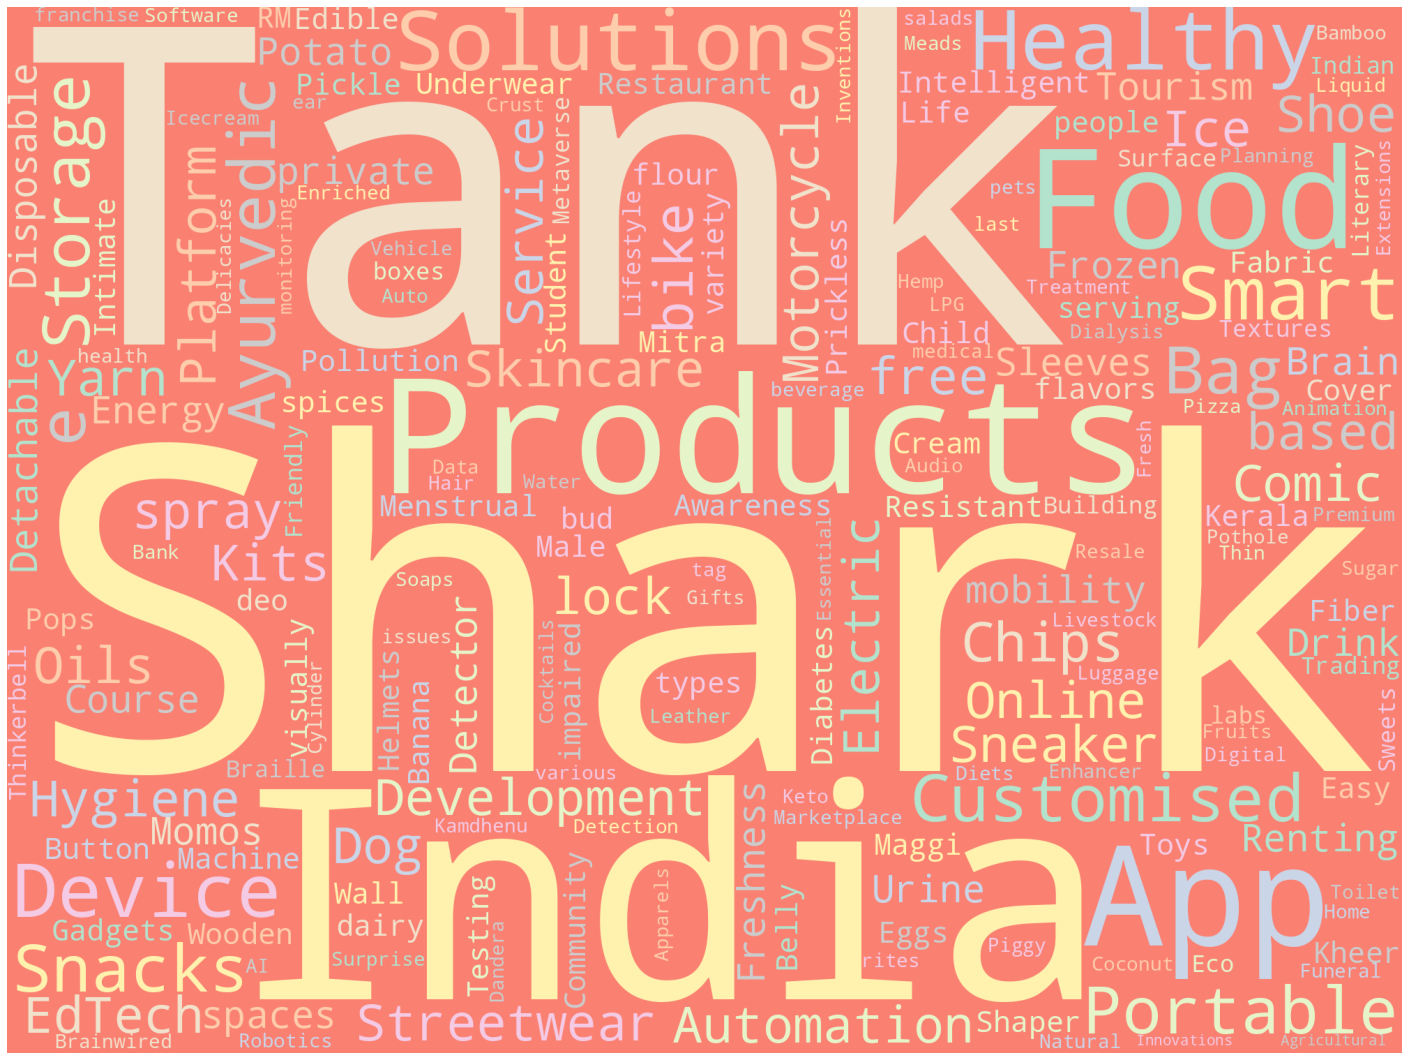

In [48]:
# Word cloud based on Business Description
text = " Shark Tank India ".join(cat for cat in shark_tank['Business Description'])
stop_words = list(STOPWORDS)
wordcloud = WordCloud(width=2000, height=1500, stopwords=stop_words, background_color='salmon', colormap='Pastel2', collocations=False, random_state=2022).generate(text)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Data set values verification
##### below queries should not return any rows

In [49]:
shark_tank.loc[shark_tank['Number of Presenters'] != shark_tank['Male Presenters'].fillna(0) + shark_tank['Female Presenters'].fillna(0)]

,Season Number,Episode Number,Episode Title,Pitch Number,Startup Name,Industry,Business Description,Company Website,Number of Presenters,Male Presenters,Female Presenters,Couple Presenters,Pitchers Average Age,Started in,Pitchers City,Pitchers State,Yearly Revenue,Monthly Sales,Gross Margin,Original Ask Amount,Original Ask Equity,Valuation Requested,Received Offer,Accepted Offer,Total Deal Amount,Total Deal Equity,Total Deal Debt,Valuation Offered,Ashneer Investment Amount,Ashneer Investment Equity,Ashneer Debt Amount,Namita Investment Amount,Namita Investment Equity,Namita Debt Amount,Anupam Investment Amount,Anupam Investment Equity,Anupam Debt Amount,Vineeta Investment Amount,Vineeta Investment Equity,Vineeta Debt Amount,Aman Investment Amount,Aman Investment Equity,Aman Debt Amount,Peyush Investment Amount,Peyush Investment Equity,Peyush Debt Amount,Ghazal Investment Amount,Ghazal Investment Equity,Ghazal Debt Amount,Number of sharks in deal


In [50]:
shark_tank.loc[(shark_tank['Accepted Offer'] == 1) & (shark_tank['Total Deal Amount'].isnull())]

,Season Number,Episode Number,Episode Title,Pitch Number,Startup Name,Industry,Business Description,Company Website,Number of Presenters,Male Presenters,Female Presenters,Couple Presenters,Pitchers Average Age,Started in,Pitchers City,Pitchers State,Yearly Revenue,Monthly Sales,Gross Margin,Original Ask Amount,Original Ask Equity,Valuation Requested,Received Offer,Accepted Offer,Total Deal Amount,Total Deal Equity,Total Deal Debt,Valuation Offered,Ashneer Investment Amount,Ashneer Investment Equity,Ashneer Debt Amount,Namita Investment Amount,Namita Investment Equity,Namita Debt Amount,Anupam Investment Amount,Anupam Investment Equity,Anupam Debt Amount,Vineeta Investment Amount,Vineeta Investment Equity,Vineeta Debt Amount,Aman Investment Amount,Aman Investment Equity,Aman Debt Amount,Peyush Investment Amount,Peyush Investment Equity,Peyush Debt Amount,Ghazal Investment Amount,Ghazal Investment Equity,Ghazal Debt Amount,Number of sharks in deal


In [51]:
shark_tank.loc[(shark_tank['Male Presenters'].isnull()) & (shark_tank['Couple Presenters'] == 1)]

,Season Number,Episode Number,Episode Title,Pitch Number,Startup Name,Industry,Business Description,Company Website,Number of Presenters,Male Presenters,Female Presenters,Couple Presenters,Pitchers Average Age,Started in,Pitchers City,Pitchers State,Yearly Revenue,Monthly Sales,Gross Margin,Original Ask Amount,Original Ask Equity,Valuation Requested,Received Offer,Accepted Offer,Total Deal Amount,Total Deal Equity,Total Deal Debt,Valuation Offered,Ashneer Investment Amount,Ashneer Investment Equity,Ashneer Debt Amount,Namita Investment Amount,Namita Investment Equity,Namita Debt Amount,Anupam Investment Amount,Anupam Investment Equity,Anupam Debt Amount,Vineeta Investment Amount,Vineeta Investment Equity,Vineeta Debt Amount,Aman Investment Amount,Aman Investment Equity,Aman Debt Amount,Peyush Investment Amount,Peyush Investment Equity,Peyush Debt Amount,Ghazal Investment Amount,Ghazal Investment Equity,Ghazal Debt Amount,Number of sharks in deal


In [52]:
shark_tank.loc[(shark_tank['Female Presenters'].isnull()) & (shark_tank['Couple Presenters'] == 1)]

,Season Number,Episode Number,Episode Title,Pitch Number,Startup Name,Industry,Business Description,Company Website,Number of Presenters,Male Presenters,Female Presenters,Couple Presenters,Pitchers Average Age,Started in,Pitchers City,Pitchers State,Yearly Revenue,Monthly Sales,Gross Margin,Original Ask Amount,Original Ask Equity,Valuation Requested,Received Offer,Accepted Offer,Total Deal Amount,Total Deal Equity,Total Deal Debt,Valuation Offered,Ashneer Investment Amount,Ashneer Investment Equity,Ashneer Debt Amount,Namita Investment Amount,Namita Investment Equity,Namita Debt Amount,Anupam Investment Amount,Anupam Investment Equity,Anupam Debt Amount,Vineeta Investment Amount,Vineeta Investment Equity,Vineeta Debt Amount,Aman Investment Amount,Aman Investment Equity,Aman Debt Amount,Peyush Investment Amount,Peyush Investment Equity,Peyush Debt Amount,Ghazal Investment Amount,Ghazal Investment Equity,Ghazal Debt Amount,Number of sharks in deal


In [53]:
shark_tank.loc[round(shark_tank['Total Deal Amount'].fillna(0),1) != round(shark_tank['Ashneer Investment Amount'].fillna(0) + shark_tank['Namita Investment Amount'].fillna(0) + shark_tank['Anupam Investment Amount'].fillna(0) + shark_tank['Vineeta Investment Amount'].fillna(0) + shark_tank['Aman Investment Amount'].fillna(0) + shark_tank['Peyush Investment Amount'].fillna(0) + shark_tank['Ghazal Investment Amount'].fillna(0), 1)]

,Season Number,Episode Number,Episode Title,Pitch Number,Startup Name,Industry,Business Description,Company Website,Number of Presenters,Male Presenters,Female Presenters,Couple Presenters,Pitchers Average Age,Started in,Pitchers City,Pitchers State,Yearly Revenue,Monthly Sales,Gross Margin,Original Ask Amount,Original Ask Equity,Valuation Requested,Received Offer,Accepted Offer,Total Deal Amount,Total Deal Equity,Total Deal Debt,Valuation Offered,Ashneer Investment Amount,Ashneer Investment Equity,Ashneer Debt Amount,Namita Investment Amount,Namita Investment Equity,Namita Debt Amount,Anupam Investment Amount,Anupam Investment Equity,Anupam Debt Amount,Vineeta Investment Amount,Vineeta Investment Equity,Vineeta Debt Amount,Aman Investment Amount,Aman Investment Equity,Aman Debt Amount,Peyush Investment Amount,Peyush Investment Equity,Peyush Debt Amount,Ghazal Investment Amount,Ghazal Investment Equity,Ghazal Debt Amount,Number of sharks in deal


In [54]:
shark_tank.loc[round(shark_tank['Total Deal Equity'].fillna(0),1) != round(shark_tank['Ashneer Investment Equity'].fillna(0) + shark_tank['Namita Investment Equity'].fillna(0) + shark_tank['Anupam Investment Equity'].fillna(0) + shark_tank['Vineeta Investment Equity'].fillna(0) + shark_tank['Aman Investment Equity'].fillna(0) + shark_tank['Peyush Investment Equity'].fillna(0) + shark_tank['Ghazal Investment Equity'].fillna(0),1)]

,Season Number,Episode Number,Episode Title,Pitch Number,Startup Name,Industry,Business Description,Company Website,Number of Presenters,Male Presenters,Female Presenters,Couple Presenters,Pitchers Average Age,Started in,Pitchers City,Pitchers State,Yearly Revenue,Monthly Sales,Gross Margin,Original Ask Amount,Original Ask Equity,Valuation Requested,Received Offer,Accepted Offer,Total Deal Amount,Total Deal Equity,Total Deal Debt,Valuation Offered,Ashneer Investment Amount,Ashneer Investment Equity,Ashneer Debt Amount,Namita Investment Amount,Namita Investment Equity,Namita Debt Amount,Anupam Investment Amount,Anupam Investment Equity,Anupam Debt Amount,Vineeta Investment Amount,Vineeta Investment Equity,Vineeta Debt Amount,Aman Investment Amount,Aman Investment Equity,Aman Debt Amount,Peyush Investment Amount,Peyush Investment Equity,Peyush Debt Amount,Ghazal Investment Amount,Ghazal Investment Equity,Ghazal Debt Amount,Number of sharks in deal


In [55]:
shark_tank.loc[round(shark_tank['Total Deal Debt'].fillna(0),1) != round(shark_tank['Ashneer Debt Amount'].fillna(0) + shark_tank['Namita Debt Amount'].fillna(0) + shark_tank['Anupam Debt Amount'].fillna(0) + shark_tank['Vineeta Debt Amount'].fillna(0) + shark_tank['Aman Debt Amount'].fillna(0) + shark_tank['Peyush Debt Amount'].fillna(0) + shark_tank['Ghazal Debt Amount'].fillna(0),1)]

,Season Number,Episode Number,Episode Title,Pitch Number,Startup Name,Industry,Business Description,Company Website,Number of Presenters,Male Presenters,Female Presenters,Couple Presenters,Pitchers Average Age,Started in,Pitchers City,Pitchers State,Yearly Revenue,Monthly Sales,Gross Margin,Original Ask Amount,Original Ask Equity,Valuation Requested,Received Offer,Accepted Offer,Total Deal Amount,Total Deal Equity,Total Deal Debt,Valuation Offered,Ashneer Investment Amount,Ashneer Investment Equity,Ashneer Debt Amount,Namita Investment Amount,Namita Investment Equity,Namita Debt Amount,Anupam Investment Amount,Anupam Investment Equity,Anupam Debt Amount,Vineeta Investment Amount,Vineeta Investment Equity,Vineeta Debt Amount,Aman Investment Amount,Aman Investment Equity,Aman Debt Amount,Peyush Investment Amount,Peyush Investment Equity,Peyush Debt Amount,Ghazal Investment Amount,Ghazal Investment Equity,Ghazal Debt Amount,Number of sharks in deal


In [56]:
# Correlation matrix
shark_tank.corr().style.background_gradient(cmap = 'Blues')

,Season Number,Episode Number,Pitch Number,Number of Presenters,Male Presenters,Female Presenters,Couple Presenters,Started in,Yearly Revenue,Monthly Sales,Gross Margin,Original Ask Amount,Original Ask Equity,Valuation Requested,Received Offer,Accepted Offer,Total Deal Amount,Total Deal Equity,Total Deal Debt,Valuation Offered,Ashneer Investment Amount,Ashneer Investment Equity,Ashneer Debt Amount,Namita Investment Amount,Namita Investment Equity,Namita Debt Amount,Anupam Investment Amount,Anupam Investment Equity,Anupam Debt Amount,Vineeta Investment Amount,Vineeta Investment Equity,Vineeta Debt Amount,Aman Investment Amount,Aman Investment Equity,Aman Debt Amount,Peyush Investment Amount,Peyush Investment Equity,Peyush Debt Amount,Ghazal Investment Amount,Ghazal Investment Equity,Ghazal Debt Amount,Number of sharks in deal
Season Number,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Episode Number,nan,1.000000,0.998874,-0.012831,0.063426,-0.168494,-0.237616,0.162702,0.229450,-0.000753,-0.105350,-0.070837,-0.101707,-0.013888,-0.093228,-0.230791,-0.012258,-0.005052,0.144845,-0.059598,-0.030034,-0.039051,1.000000,0.062158,0.079419,nan,-0.130586,-0.122271,nan,-0.032484,-0.302209,nan,-0.070180,-0.025619,nan,0.080449,0.009889,0.035945,-0.029239,-0.072721,nan,0.111119
Pitch Number,nan,0.998874,1.000000,-0.012865,0.059607,-0.165804,-0.235428,0.160961,0.232260,-0.002048,-0.117280,-0.075863,-0.106718,-0.014647,-0.096161,-0.241335,-0.019670,-0.005390,0.151422,-0.058731,-0.023299,-0.024034,1.000000,0.052519,0.073819,nan,-0.137392,-0.120447,nan,-0.036117,-0.290707,nan,-0.075704,-0.039404,nan,0.087075,0.009053,0.028267,-0.059523,-0.084542,nan,0.106700
Number of Presenters,nan,-0.012831,-0.012865,1.000000,0.771610,0.402817,0.175425,-0.013173,0.015887,-0.125812,-0.210064,-0.106502,-0.215936,-0.091405,0.089887,-0.092300,0.135661,-0.335785,0.140802,0.273789,0.032021,-0.083912,nan,-0.072939,-0.111257,nan,0.173310,-0.127911,nan,0.160085,-0.223706,nan,-0.011925,0.063708,nan,0.070445,-0.226609,0.460721,0.295510,-0.173139,nan,0.138681
Male Presenters,nan,0.063426,0.059607,0.771610,1.000000,-0.158876,-0.327191,0.106889,0.064707,-0.186470,-0.059904,-0.075309,-0.201248,-0.048613,0.192875,-0.006110,-0.002795,-0.224358,0.373901,0.224083,-0.035609,-0.058563,1.000000,-0.112981,-0.225774,nan,0.230888,-0.008907,nan,-0.046414,-0.238381,nan,0.014829,0.067490,nan,-0.056195,-0.150792,-0.039653,0.258409,-0.094657,nan,0.079284
Female Presenters,nan,-0.168494,-0.165804,0.402817,-0.158876,1.000000,-0.065259,-0.046141,-0.233434,-0.163965,-0.010244,-0.130915,0.091566,0.074399,-0.081932,-0.158816,-0.225348,-0.015846,nan,-0.178713,-0.210038,-0.204951,nan,-0.188110,-0.101794,nan,0.175822,0.088983,nan,nan,nan,nan,0.021036,0.221065,nan,-0.153340,-0.020392,nan,nan,nan,nan,0.063509
Couple Presenters,nan,-0.237616,-0.235428,0.175425,-0.327191,-0.065259,1.000000,-0.227799,-0.072594,0.176497,-0.193264,-0.044521,-0.076184,-0.075900,-0.062017,0.052965,0.262686,-0.165451,-0.017631,0.135120,0.177149,-0.053172,-1.000000,0.168146,0.130526,nan,0.129473,-0.027212,nan,0.013324,-0.068028,nan,-0.096931,-0.118676,nan,0.209169,-0.115977,0.544331,nan,nan,nan,0.058388
Started in,nan,0.162702,0.160961,-0.013173,0.106889,-0.046141,-0.227799,1.000000,-0.034266,-0.340185,0.360886,-0.207172,-0.104634,-0.186487,0.226832,0.212902,-0.129767,-0.187335,0.488846,-0.089963,-0.221356,-0.276100,nan,0.164363,0.452193,nan,-0.065094,0.242318,nan,-0.020511,0.019177,nan,0.136561,0.251257,nan,-0.392043,-0.486384,0.991241,0.626212,0.637001,nan,0.134723
Yearly Revenue,nan,0.229450,0.232260,0.015887,0.064707,-0.233434,-0.072594,-0.034266,1.000000,0.251232,0.255447,-0.043136,-0.188755,0.253873,0.194548,-0.354470,0.338092,0.000968,nan,0.419453,0.378171,-0.214429,nan,-0.219892,-0.162072,nan,-0.115717,-0.130418,nan,-0.349575,-0.365353,nan,0.473047,0.475675,nan,-0.051308,-0.056494,nan,0.964455,-0.51

In [57]:
print("numpy version: {}". format(np.__version__))
print("pandas version: {}". format(pd.__version__))
import matplotlib
print("matplotlib version: {}". format(matplotlib. __version__))
print("seaborn version: {}". format(sns.__version__))

# numpy version: 1.20.3
# pandas version: 1.3.5
# matplotlib version: 3.5.1
# seaborn version: 0.11.2

numpy version: 1.20.3
pandas version: 1.3.5
matplotlib version: 3.5.1
seaborn version: 0.11.2
